In [1]:
# Standard Imports 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Import dataset 
df = pd.read_csv("./data/raw/resale-flat-prices-based-on-approval-date-1990-1999.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [3]:
# Check for missing data 
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [4]:
# Check datatypes
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price             int64
dtype: object

# Data Cleaning
- Month (Separate month and year) 
- Drop street_name column and block
- Convert lease_commence_date to leased_duration

In [5]:
# Check for unique values
for column in df:
    print(pd.unique(df[column]))

['1990-01' '1990-02' '1990-03' '1990-04' '1990-05' '1990-06' '1990-07'
 '1990-08' '1990-09' '1990-10' '1990-11' '1990-12' '1991-01' '1991-02'
 '1991-03' '1991-04' '1991-05' '1991-06' '1991-07' '1991-08' '1991-09'
 '1991-10' '1991-11' '1991-12' '1992-01' '1992-02' '1992-03' '1992-04'
 '1992-05' '1992-06' '1992-07' '1992-08' '1992-09' '1992-10' '1992-11'
 '1992-12' '1993-01' '1993-02' '1993-03' '1993-04' '1993-05' '1993-06'
 '1993-07' '1993-08' '1993-09' '1993-10' '1993-11' '1993-12' '1994-01'
 '1994-02' '1994-03' '1994-04' '1994-05' '1994-06' '1994-07' '1994-08'
 '1994-09' '1994-10' '1994-11' '1994-12' '1995-01' '1995-02' '1995-03'
 '1995-04' '1995-05' '1995-06' '1995-07' '1995-08' '1995-09' '1995-10'
 '1995-11' '1995-12' '1996-01' '1996-02' '1996-03' '1996-04' '1996-05'
 '1996-06' '1996-07' '1996-08' '1996-09' '1996-10' '1996-11' '1996-12'
 '1997-01' '1997-02' '1997-03' '1997-04' '1997-05' '1997-06' '1997-07'
 '1997-08' '1997-09' '1997-10' '1997-11' '1997-12' '1998-01' '1998-02'
 '1998

In [6]:
# Splitting month to year and month 
df[['year', 'month']] = df['month'].str.split('-', expand=True)

In [7]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000,1990
1,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000,1990
2,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000,1990
3,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000,1990
4,01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200,1990


In [8]:
# Drop Street_name
df.drop(['street_name', 'block'], axis=1, inplace=True)
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000,1990
1,01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000,1990
2,01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000,1990
3,01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000,1990
4,01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200,1990


In [9]:
# Split storeys
# High floor - 9th floor and up
# Low Floor - 8th and below
df[['lower_floor', 'upper_floor']] = df['storey_range'].str.split('TO', expand=True)
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,lower_floor,upper_floor
0,01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000,1990,10,12
1,01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000,1990,04,06
2,01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000,1990,10,12
3,01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000,1990,07,09
4,01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200,1990,04,06


In [10]:
df["lower_floor"] = df["lower_floor"].astype(int)
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,lower_floor,upper_floor
0,01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000,1990,10,12
1,01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000,1990,4,06
2,01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000,1990,10,12
3,01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000,1990,7,09
4,01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200,1990,4,06


In [11]:
df.dtypes

month                   object
town                    object
flat_type               object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price             int64
year                    object
lower_floor              int32
upper_floor             object
dtype: object

In [12]:
bins = [1, 8, float('inf')]
labels = ["Low", "High"]
df["floor"] = pd.cut(df["lower_floor"], bins=bins, labels=labels, right=False)

df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,lower_floor,upper_floor,floor
0,01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000,1990,10,12,High
1,01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000,1990,4,06,Low
2,01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000,1990,10,12,High
3,01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000,1990,7,09,Low
4,01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200,1990,4,06,Low


In [13]:
# Change dtypes
df = df.astype({"month": int, "year": int})

In [14]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,lower_floor,upper_floor,floor
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000,1990,10,12,High
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000,1990,4,06,Low
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000,1990,10,12,High
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000,1990,7,09,Low
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200,1990,4,06,Low


# EDA 


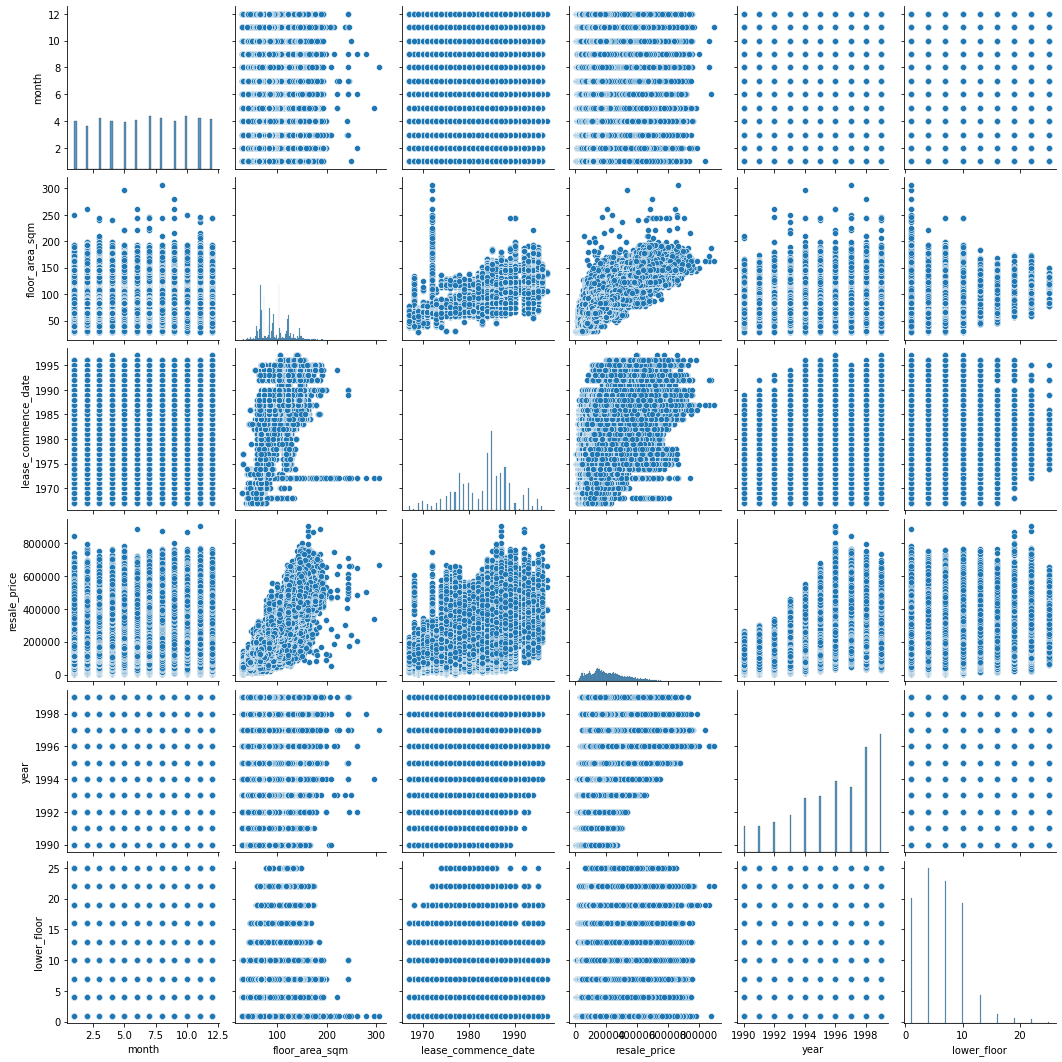

In [15]:
# Pairplot
sns.pairplot(df)

In [16]:
# Stats
df.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,year,lower_floor
count,287200.000000,287200.000000,287200.000000,287200.000000,287200.000000,287200.000000
mean,6.606536,93.351439,1983.206741,219541.850313,1995.915066,6.204363
std,3.434131,27.361839,6.085734,128144.384286,2.674011,4.173068
min,1.000000,28.000000,1967.000000,5000.000000,1990.000000,1.000000
25%,4.000000,68.000000,1979.000000,127000.000000,1994.000000,4.000000
50%,7.000000,91.000000,1984.000000,195000.000000,1996.000000,7.000000
75%,10.000000,113.000000,1987.000000,298000.000000,1998.000000,10.000000
max,12.000000,307.000000,1997.000000,900000.000000,1999.000000,25.000000


In [17]:
df.corr()

,month,floor_area_sqm,lease_commence_date,resale_price,year,lower_floor
month,1.000000,0.004093,0.017654,0.032373,-0.042002,-0.005789
floor_area_sqm,0.004093,1.000000,0.578498,0.797008,0.139423,0.025705
lease_commence_date,0.017654,0.578498,1.000000,0.505054,0.252881,-0.113566
resale_price,0.032373,0.797008,0.505054,1.000000,0.491466,0.062944
year,-0.042002,0.139423,0.252881,0.491466,1.000000,-0.029938
lower_floor,-0.005789,0.025705,-0.113566,0.062944,-0.029938,1.000000


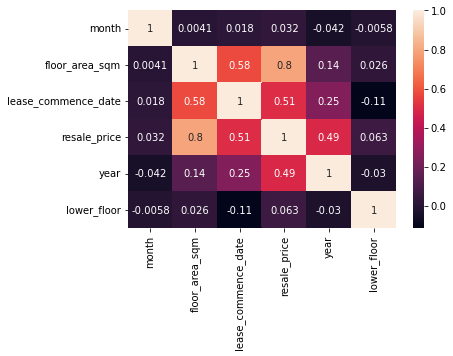

In [18]:
sns.heatmap(df.corr(), annot=True)

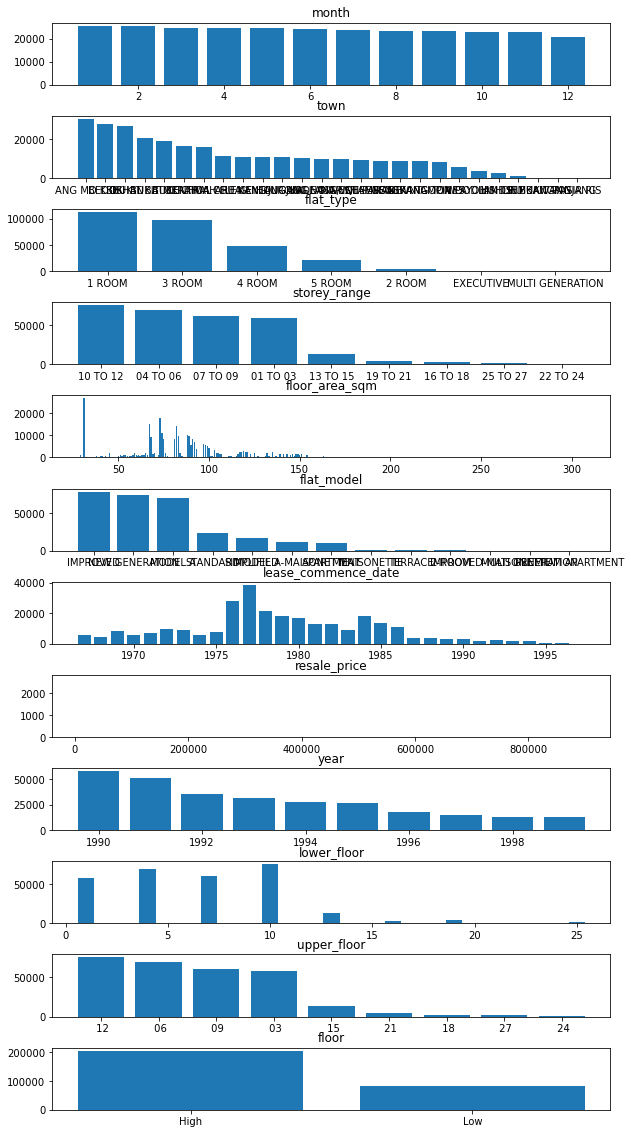

In [29]:
nrows = len(df.columns)
fig, axes = plt.subplots(nrows = nrows, ncols = 1, figsize=(10, 20))
fig.subplots_adjust(hspace=.5)
r = 0

for column in df:
    axes[r].bar(df[column].unique(), df[column].value_counts())
    axes[r].set_title(str(column))
    r = r + 1 

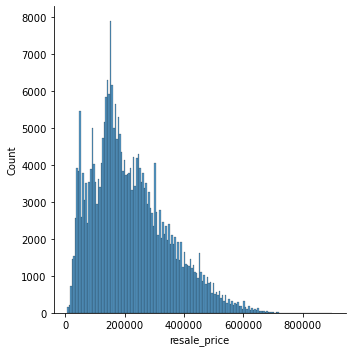

In [28]:
sns.displot(df['resale_price'])

In [30]:
df['flat_type'].value_counts()

3 ROOM              113106
4 ROOM               98521
5 ROOM               48206
EXECUTIVE            22121
2 ROOM                4140
1 ROOM                 827
MULTI GENERATION       279
Name: flat_type, dtype: int64

# Data Preprocessing
- Encoding